In [1]:
import os
import unicodedata

import pandas as pd
import pymssql
from utils import null_verificator, clean_acents, get_10_mas_frecuentes
from collections import Counter

C:\Users\B38381\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  """


In [2]:
connection_b20 = pymssql.connect(host='10.10.33.92\SQL2008',
                             user='userweb',
                             port=1433,
                             password='$$W3BVPC2@17',
                             database='WEBVPC'
                            )

In [3]:
query_conoceme = """
    SELECT * FROM WEBBE_INFINITY_CONOCEME ORDER BY FECHA_ACTUALIZACION DESC
"""
conoceme = pd.read_sql(
   query_conoceme , connection_b20
)
conoceme.head(10)

,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_INVERSION,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP
0,0010545047,Servicios,Metalmecánica,Proyectos,"La empresa brinda servicios de proyectos, inge...",Brinda un servicio diferenciado desde la ingen...,Fortalezas:\r\n- Cartera de clientes de buen c...,None,None,B30434,...,NaN,NaN,2020-11-09 00:00:00,None,0,0,NaN,NaN,2019.0,2006.0
1,0009808462,Comercio,Productos Marinos,No Aplica,Importador y comercializador de productos hidr...,Cliente mantiene productos vigentes para el me...,FORTALEZAS\r\n-\tCartera de clientes atomizada...,None,None,B36512,...,NaN,NaN,2020-10-05 01:43:00,Exterior,0,None,NaN,NaN,2017.0,2006.0
2,0010647003,Comercio,Textil y calzado,No Aplica,"Importación y comercialización de colorantes, ...",Laborotio quimico in house donde tratan los re...,"(F) Mas de 30 años en el negocio, existe suces...",None,None,B36183,...,NaN,NaN,2020-10-02 19:28:45,Exterior,0,None,NaN,NaN,2020.0,1986.0
3,0008740612,Agrícola y Ganadero,Real Estate,No Aplica,El Sr. Juan Carlos Li Morales forma parte del ...,Ubicación estratégica y demanda del alquiler d...,F: Amplia experiencia del accionista en los ne...,None,None,B37708,...,NaN,NaN,2020-10-02 12:22:46,None,0,None,NaN,NaN,2001.0,1995.0
4,0015994198,Comercio,Artículos diversos,No Aplica,Empresa fue constituida en Perú en el año 2017...,Cliente tiene exclusividad en varias líneas de...,Fortalezas: Grupo Titanio tiene más de 12 años...,None,None,B36045,...,NaN,NaN,2020-10-01 22:03:29,Exterior,0,None,NaN,NaN,NaN,NaN
5,0011627517,Comercio,Tecnología y Telecomunicaciones,No Aplica,Nace como una empresa importadora y comerciali...,Experiencia en el sector tecnológico a nivel i...,F: Alianza estratégica con proveedores en Chin...,None,None,B37708,...,1.0,10000.0,2020-10-01 10:58:31,Exterior,0,0,NaN,NaN,2017.0,1998.0
6,0010969184,Industria,Imprenta y papel,No Aplica,"La empresa fue fundada en 1993, en sus inicios...",Los envases que manufactura EXITUNO tienen may...,Fortalezas:\r\nCuenta con una cartera de clien...,None,None,B35777,...,NaN,NaN,2020-09-30 11:50:12,Exterior,0,None,NaN,NaN,2010.0,1993.0
7,0011710569,Servicios,Limpieza,Servicios,Inversiones Rodalfa brinda servicios de limpie...,Ofrece un servicio diferenciado integral de li...,Fortalezas\r\n- Cartera de clientes atomizada ...,None,None,B30434,...,NaN,NaN,2020-09-30 11:26:50,None,0,None,NaN,NaN,2018.0,2007.0
8,0014449921,Servicios,Limpieza,Servicios,Empresa dedicada a brindar servicio de limpiez...,Ofrece un servicio diferenciado integral de li...,Fortalezas\r\n- Cartera atomizada conformada p...,None,None,B30434,...,NaN,NaN,2020-09-30 11:15:46,None,0,None,NaN,NaN,2018.0,2013.0
9,0011038047,Comercio,Hidrocarburos,No Aplica,PICORP se dedicada a la distribución minorist...,Tiene más de 15 años en el sector y trabaja de...,Maneja una cartera de Clientes Corporativos. \...,None,None,B35777,...,NaN,NaN,2020-09-30 10:37:47,Local,0,None,NaN,NaN,2013.0,2003.0


In [4]:
import missingno as msno

### ¿Cuantas fichas tengo?

In [5]:
conoceme.shape

(923, 26)

### ¿Que columnas se maneja?

In [6]:
conoceme.columns

Index(['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'MODELO_NEGOCIO',
       'VENTAJA_COMPETITIVA', 'FORTALEZAS_RIESGOS', 'INTEGRACION_VERTICAL',
       'GESTION_COMPRAS', 'REGISTRO', 'GERENTE_GENERAL',
       'GERENTE_FINANCIERO_TIPO', 'GERENTE_FINANCIERO_NOMBRE',
       'TIPO_CONTABILIDAD', 'MONTO_LINEA_PROVEEDORES', 'ACTIVO_LIBRE_GRAVAMEN',
       'PROYECCION_INVERSION', 'PROYECCION_VENTAS', 'FECHA_ACTUALIZACION',
       'PROCEDENCIA_MPRIMA', 'LINEA_SUCESION_FLAG', 'LINEA_SUCESION',
       'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
       'INICIO_IBK', 'INICIO_OP'],
      dtype='object')

In [7]:
pd.set_option('display.max_rows', 500)
null_verificator(conoceme)

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
COD_UNICO,False,0,object,0.0
ACTIVIDAD,True,11,object,1.2
SUBSECTOR,True,21,object,2.3
BACKLOG,True,39,object,4.2
MODELO_NEGOCIO,True,6,object,0.7
VENTAJA_COMPETITIVA,True,25,object,2.7
FORTALEZAS_RIESGOS,True,35,object,3.8
INTEGRACION_VERTICAL,True,923,object,100.0
GESTION_COMPRAS,True,864,object,93.6
REGISTRO,False,0,object,0.0


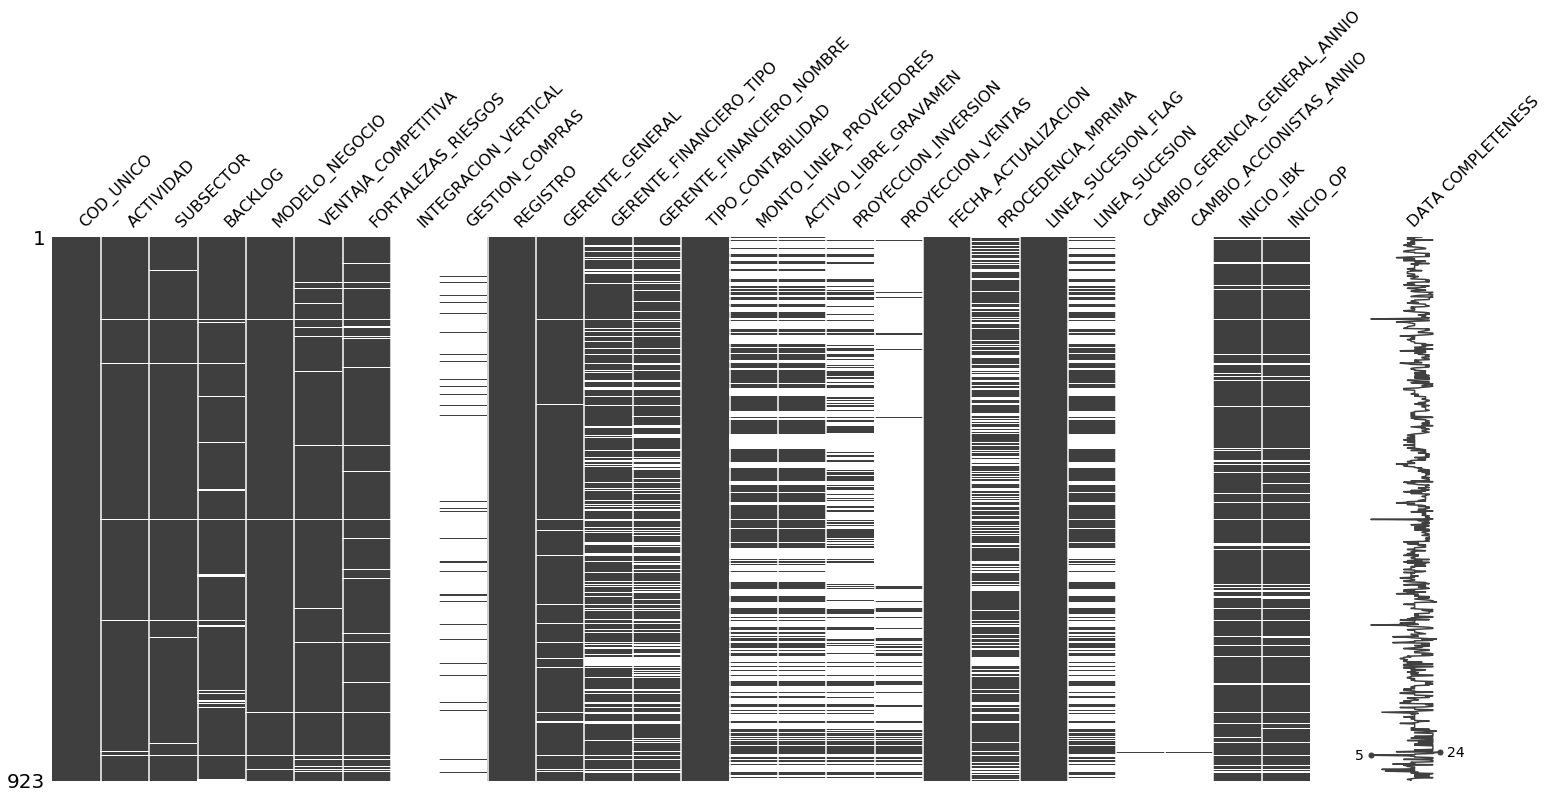

In [8]:
msno.matrix(conoceme,  labels=True)

## ANALISIS DETALLADO

### 1- Código Único

In [9]:
null_verificator(pd.DataFrame(conoceme['COD_UNICO']))

'DATA LIMPIA DE NULOS'

#### NOTA: Este es el indicador con el cual podré cruzar información en todos los registros del banco y se aprecia completo

### >> Revisión de unicidad 

In [10]:
conoceme.shape, conoceme['COD_UNICO'].unique().shape

((923, 26), (915,))

#### NOTA: No se respeta la unicidad del código único

In [11]:
valdiacion_unicidad = conoceme.groupby(by=['COD_UNICO']).size()
valdiacion_unicidad[valdiacion_unicidad > 1]

COD_UNICO
0008612010    2
0009744613    3
0011874942    5
0013812756    2
dtype: int64

#### >> revisión específica de caso de duplicidad de código único

In [12]:
conoceme[conoceme['COD_UNICO'] == '0011874942']

,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_INVERSION,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP
496,0011874942,Industria,Textil y calzado,Servicios,CONFECCIÓN DE PRENDAS INDUSTRIAS Y DE SEGURIDAD,ALTO NIVEL EN CONFECCIÓN DE SUS PRENDAS QUE LE...,- MAS DE 15 AÑOS DE EXPERIENCIA EN EL MERCADO\...,None,None,B30605,...,200.0,NaN,2020-08-18,Local,0,0,NaN,NaN,2016.0,2017.0
507,0011874942,Industria,Textil y calzado,Servicios,CONFECCIÓN DE PRENDAS INDUSTRIAS Y DE SEGURIDAD,ALTO NIVEL EN CONFECCIÓN DE SUS PRENDAS QUE LE...,- MAS DE 15 AÑOS DE EXPERIENCIA EN EL MERCADO\...,None,None,B30605,...,200.0,NaN,2020-08-18,Local,0,0,NaN,NaN,2016.0,2017.0
508,0011874942,Industria,Textil y calzado,Servicios,CONFECCIÓN DE PRENDAS INDUSTRIAS Y DE SEGURIDAD,ALTO NIVEL EN CONFECCIÓN DE SUS PRENDAS QUE LE...,- MAS DE 15 AÑOS DE EXPERIENCIA EN EL MERCADO\...,None,None,B30605,...,200.0,NaN,2020-08-18,Local,0,0,NaN,NaN,2016.0,2017.0
509,0011874942,Industria,Textil y calzado,Servicios,CONFECCIÓN DE PRENDAS INDUSTRIAS Y DE SEGURIDAD,ALTO NIVEL EN CONFECCIÓN DE SUS PRENDAS QUE LE...,- MAS DE 15 AÑOS DE EXPERIENCIA EN EL MERCADO\...,None,None,B30605,...,200.0,NaN,2020-08-18,Local,0,0,NaN,NaN,2016.0,2017.0
512,0011874942,Industria,Textil y calzado,Servicios,CONFECCIÓN DE PRENDAS INDUSTRIAS Y DE SEGURIDAD,ALTO NIVEL EN CONFECCIÓN DE SUS PRENDAS QUE LE...,- MAS DE 15 AÑOS DE EXPERIENCIA EN EL MERCADO\...,None,None,B30605,...,200.0,NaN,2020-08-18,Local,0,0,NaN,NaN,2016.0,2017.0


#### >> FORMATO

In [13]:
conoceme['len_codigo_unico'] = conoceme['COD_UNICO'].apply(lambda _: len(_))
conoceme['len_codigo_unico'].value_counts()

10    923
Name: len_codigo_unico, dtype: int64

#### NOTA: Todos los valores de código único son de tamaño 10, formato uniforme

## 2- ACTIVIDAD - SUBSEECTOR

In [ ]:
ho: TODOS LOS CLIENTES CON UN GESTION FINANCIERA como tipo asesor son mas riesgosas ....

In [14]:
null_verificator(pd.DataFrame(conoceme[['ACTIVIDAD', 'SUBSECTOR']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
ACTIVIDAD,True,11,object,1.2
SUBSECTOR,True,21,object,2.3


#### ¿Cuantos son nulos al mismo tiempo?

In [15]:
pd.crosstab(
    conoceme['ACTIVIDAD'].isnull(), conoceme['SUBSECTOR'].isnull(), margins= False
)

SUBSECTOR,False,True
ACTIVIDAD,,
False,901,11
True,1,10


#### ¿Quienes son?

In [16]:
activ_subsec_null = conoceme[
    (conoceme['ACTIVIDAD'].isnull()) & (conoceme['SUBSECTOR'].isnull())
]
activ_subsec_null.head(10)

,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP,len_codigo_unico
35,0010856041,None,None,None,"Empresa constituida en 1999, para dedicarse a ...",El cliente cuenta con 6 marcas propias en el R...,Cuenta con alto nivel de existencias.\r\nDada ...,None,None,B36512,...,NaN,2020-09-27 21:17:33,Exterior,0,None,NaN,NaN,2008.0,1999.0,10
139,0014223425,None,None,None,None,None,None,None,None,B17638,...,NaN,2020-09-11 12:49:27,None,0,None,NaN,NaN,NaN,NaN,10
144,0015287009,None,None,None,ESTACIONES DE SERVICIO / CADENA DE GRIFOS,UBICACIÓN ESTRATÉGICA,AMPLIA RELACIÓN CON SUS CLIENTES,None,None,B38098,...,NaN,2020-09-10 21:00:27,Local,0,None,NaN,NaN,NaN,NaN,10
214,0010821635,None,None,None,Empresa dedicada a la importación de productos...,Cliente con marca propia en el mercado con más...,Clientes fidelizados desde hace más de 5 años ...,None,None,B36512,...,NaN,2020-09-03 00:00:00,Exterior,0,0,NaN,NaN,NaN,NaN,10
244,0000232207,None,None,None,dedicada a la importación y comercialización d...,-\tRelación y trato directo con sus proveedore...,-\tEmpresa con más de 40 años en el mercado. (...,None,None,B23576,...,NaN,2020-08-31 00:00:00,None,0,0,NaN,NaN,2010.0,1973.0,10
479,0014120811,None,None,None,None,None,None,None,None,B36503,...,NaN,2020-08-19 11:09:27,None,0,None,NaN,NaN,NaN,NaN,10
590,0006894786,None,None,None,Keyperu es una empresa del rubro de agro-expor...,Keyperu mantiene una alianza estratégica con s...,Fortaleza: Cuenta con certificados de acredita...,None,None,B36512,...,21600.0,2020-07-27 00:00:00,Local,0,0,NaN,NaN,NaN,NaN,10
650,0010196354,None,None,None,Empresa dedicada a la venta al por mayor y men...,experiencia en el sector de más de 25 años,experiencia en el sector de más de 25 años y f...,None,None,B37246,...,NaN,2020-07-21 00:00:00,None,0,0,NaN,NaN,NaN,NaN,10
658,0011793990,None,None,None,None,None,None,None,None,B30438,...,NaN,2020-07-20 12:49:38,None,0,None,NaN,NaN,NaN,NaN,10
879,0014895013,None,None,None,None,None,None,None,None,B25950,...,NaN,2019-12-13 16:54:46,None,0,None,NaN,NaN,NaN,NaN,10


#### ¿CUantos no se tiene nisiqueira la inof de modelo de negocio?

In [17]:
conoceme[
    (conoceme['ACTIVIDAD'].isnull()) & (conoceme['SUBSECTOR'].isnull()) &  (conoceme['MODELO_NEGOCIO'].isnull())
].shape[0]

4

#### NOTA: Para poder entrar en análisi de SECTOR O RUBRO sería necesario completar estos casos falatantes en particular

## 3- BACKLOG

Empresa que se maneja mediante contratos de prestación de bienes o servicios únicos durante un periodo de tiempo determinado. Esto puede ser de dos tipos
 <br/><br/>
Backlog de Proyectos: Empresa que mantiene lista de contratos en donde el bien o servicio es distinto para cada tipo de cliente, mostrando volatilidad en el registro de facturación debido a la entrega parcial del objeto del contrato.  
Ejemplo: Construcción del Hospital Dos de Mayo y Construcción del Hospital Alcides Carrión, la empresa construye hospitales pero cada hospital es un proyecto distinto.
implementación de un software a medida, construcción de estructuras metalmecánicas, servicios de supervisión, consultoría de proyectos, implementación de torres de alta tensión, entre otros.
 <br/><br/>
Backlog de Servicios: Empresa que mantiene lista de contratos en donde el bien o servicio es homogéneo para cada tipo de cliente y permite prever una estabilidad en las ventas del cliente.
Ejemplo: Alquiler de maquinaria, transporte de personal, entre otros."

In [18]:
null_verificator(pd.DataFrame(conoceme[['BACKLOG']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
BACKLOG,True,39,object,4.2


In [19]:
conoceme['BACKLOG'].value_counts(dropna=False)

No Aplica    721
Servicios     99
Proyectos     64
NaN           39
Name: BACKLOG, dtype: int64

#### NOTA: Seria necesario especificar si los casos nulos efectivamnete pertenecen a la categoría "NO APLICA" o que falta una revalidación de llenado de la información

## 4- VENTAJA_COMPETITIVA

Señalar la principal ventaja competitiva en su sector

In [20]:
null_verificator(pd.DataFrame(conoceme[['VENTAJA_COMPETITIVA']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
VENTAJA_COMPETITIVA,True,25,object,2.7


In [21]:
get_10_mas_frecuentes(conoceme, 'VENTAJA_COMPETITIVA')

[('experiencia', 219),
 ('anos', 214),
 ('clientes', 187),
 ('empresa', 172),
 ('cuenta', 170),
 ('mercado', 152),
 ('cliente', 120),
 ('sector', 117),
 ('productos', 112),
 ('marca', 93)]

## 5- FORTALEZAS_RIESGOS

Señalar principales fortalezas y riesgos

In [23]:
null_verificator(pd.DataFrame(conoceme[['FORTALEZAS_RIESGOS']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
FORTALEZAS_RIESGOS,True,35,object,3.8


In [24]:
get_10_mas_frecuentes(conoceme, 'FORTALEZAS_RIESGOS')

[('anos', 363),
 ('clientes', 306),
 ('experiencia', 293),
 ('sector', 268),
 ('empresa', 194),
 ('mercado', 186),
 ('cuenta', 169),
 ('ventas', 165),
 ('cliente', 150),
 ('cartera', 135)]

## 6- GESTION_COMPRAS

In [26]:
null_verificator(pd.DataFrame(conoceme[['GESTION_COMPRAS']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
GESTION_COMPRAS,True,864,object,93.6


In [55]:
conoceme[conoceme['BACKLOG'] == 'Proyectos']['GESTION_COMPRAS'].value_counts(dropna=False)

Contra órdenes de pedido          35
Otros                              8
NaN                                8
Me anticipo a las licitaciones     7
Manejo stock de seguridad          6
Name: GESTION_COMPRAS, dtype: int64

In [28]:
conoceme['GESTION_COMPRAS'].value_counts(dropna=False)

NaN                               864
Contra órdenes de pedido           37
Otros                               9
Me anticipo a las licitaciones      7
Manejo stock de seguridad           6
Name: GESTION_COMPRAS, dtype: int64

#### NOTA: validar si es que no se trata de un campo descartado ya que nos e visualzia en el formulario web

## 7- REGISTRO

In [30]:
null_verificator(pd.DataFrame(conoceme[['REGISTRO']]))

'DATA LIMPIA DE NULOS'

#### NOTA: código a nivel banco de los ejecutivos

## 8- GERENTE_GENERAL

In [34]:
null_verificator(pd.DataFrame(conoceme[['GERENTE_GENERAL']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
GERENTE_GENERAL,True,26,object,2.8


## 9- MONTO_LINEA_PROVEEDORES

In [37]:
null_verificator(pd.DataFrame(conoceme[['MONTO_LINEA_PROVEEDORES']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
MONTO_LINEA_PROVEEDORES,True,445,float64,48.2


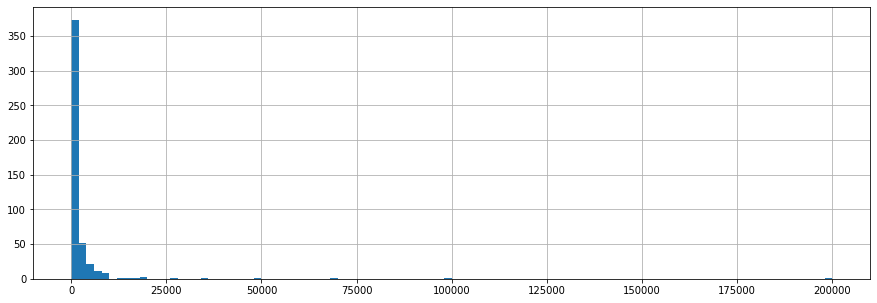

In [51]:
conoceme['MONTO_LINEA_PROVEEDORES'].hist(bins=100, figsize=(15, 5))

In [49]:
conoceme[['MONTO_LINEA_PROVEEDORES']].describe().T

,count,mean,std,min,25%,50%,75%,max
MONTO_LINEA_PROVEEDORES,478.0,2540.121339,11302.333818,1.0,35.0,500.0,1750.0,200000.0


## 10- PROYECCION_VENTAS

In [52]:
null_verificator(pd.DataFrame(conoceme[['PROYECCION_VENTAS']]))

,Nulos,Cantidad,Tipo Col,Porcentaje de nulos
PROYECCION_VENTAS,True,804,float64,87.1


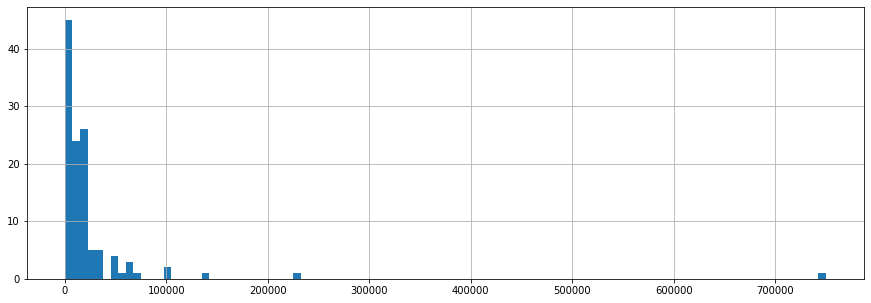

In [53]:
conoceme['PROYECCION_VENTAS'].hist(bins=100, figsize=(15, 5))

In [54]:
conoceme[['PROYECCION_VENTAS']].describe().T

,count,mean,std,min,25%,50%,75%,max
PROYECCION_VENTAS,119.0,25905.210084,72988.221825,1.0,6000.0,12000.0,20000.0,750000.0


In [36]:
conoceme.columns

Index(['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'MODELO_NEGOCIO',
       'VENTAJA_COMPETITIVA', 'FORTALEZAS_RIESGOS', 'INTEGRACION_VERTICAL',
       'GESTION_COMPRAS', 'REGISTRO', 'GERENTE_GENERAL',
       'GERENTE_FINANCIERO_TIPO', 'GERENTE_FINANCIERO_NOMBRE',
       'TIPO_CONTABILIDAD', 'MONTO_LINEA_PROVEEDORES', 'ACTIVO_LIBRE_GRAVAMEN',
       'PROYECCION_INVERSION', 'PROYECCION_VENTAS', 'FECHA_ACTUALIZACION',
       'PROCEDENCIA_MPRIMA', 'LINEA_SUCESION_FLAG', 'LINEA_SUCESION',
       'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
       'INICIO_IBK', 'INICIO_OP', 'len_codigo_unico'],
      dtype='object')

In [61]:
print({'20501640981',
'20601433525',
'20482709487',
'20602179932',
'20601084156',
'10448952938',
'20602966951',
'10296894945',
'20454712928',
'20537067111',
'20603514247',
'20600420098',
'10705186702',
'20604688044',
'20601975786',
'20601824940',
'20535661201'})

{'20603514247', '20601975786', '20601433525', '20602966951', '20537067111', '20501640981', '20454712928', '20604688044', '20601084156', '10296894945', '20600420098', '20602179932', '10448952938', '20482709487', '20535661201', '10705186702', '20601824940'}
